In [1]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

In [3]:
# scaling function for input data
def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)


# make dataset to train

In [4]:
# scaling function for input data
def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [5]:
# make dataset to input
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]  # Next close price
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [6]:
# hyper parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [7]:
# load data
xy = np.loadtxt("data-02-stock_daily.csv", delimiter=",")
xy = xy[::-1]  # reverse order

# split train-test set
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

# scaling data
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

# make train-test dataset to input
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

# convert to tensor
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]] -> [0.16053716]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.7831

 [0.09107454 0.09103957 0.10219805 0.11551492 0.08547077]] -> [0.09902474]
[[0.10822158 0.10300312 0.11791384 0.19801918 0.09842631]
 [0.10377083 0.10109767 0.10978741 0.17505602 0.10310868]
 [0.09117814 0.09755902 0.11999024 0.11006543 0.10860071]
 [0.08572694 0.09960051 0.112544   0.11406292 0.10669948]
 [0.09825078 0.10276492 0.09886878 0.14244869 0.11430396]
 [0.09107454 0.09103957 0.10219805 0.11551492 0.08547077]
 [0.09821624 0.09456471 0.11737677 0.16415703 0.09902474]] -> [0.13229384]
[[0.10377083 0.10109767 0.10978741 0.17505602 0.10310868]
 [0.09117814 0.09755902 0.11999024 0.11006543 0.10860071]
 [0.08572694 0.09960051 0.112544   0.11406292 0.10669948]
 [0.09825078 0.10276492 0.09886878 0.14244869 0.11430396]
 [0.09107454 0.09103957 0.10219805 0.11551492 0.08547077]
 [0.09821624 0.09456471 0.11737677 0.16415703 0.09902474]
 [0.10915296 0.12447361 0.13599227 0.17467061 0.13229384]] -> [0.19010097]
[[0.09117814 0.09755902 0.11999024 0.11006543 0.10860071]
 [0.08572694 0.099600

 [0.76278395 0.77984067 0.8163162  0.22005628 0.7958904 ]] -> [0.7688309]
[[0.67597873 0.68275862 0.71956682 0.06548762 0.70413968]
 [0.66075159 0.64202751 0.66467969 0.14523193 0.65665139]
 [0.66332969 0.65811971 0.68285424 0.04966548 0.6586825 ]
 [0.65223901 0.66931902 0.69194151 0.09448555 0.66722436]
 [0.70049744 0.7622162  0.74080077 0.27411991 0.75861669]
 [0.76278395 0.77984067 0.8163162  0.22005628 0.7958904 ]
 [0.79311786 0.77612711 0.80419983 0.21832311 0.7688309 ]] -> [0.78316711]
[[0.66075159 0.64202751 0.66467969 0.14523193 0.65665139]
 [0.66332969 0.65811971 0.68285424 0.04966548 0.6586825 ]
 [0.65223901 0.66931902 0.69194151 0.09448555 0.66722436]
 [0.70049744 0.7622162  0.74080077 0.27411991 0.75861669]
 [0.76278395 0.77984067 0.8163162  0.22005628 0.7958904 ]
 [0.79311786 0.77612711 0.80419983 0.21832311 0.7688309 ]
 [0.74336072 0.74977892 0.79190154 0.12676345 0.78316711]] -> [0.86524101]
[[0.66332969 0.65811971 0.68285424 0.04966548 0.6586825 ]
 [0.65223901 0.6693190

In [8]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:, -1])
        return x


net = Net(data_dim, hidden_dim, output_dim, 1)

In [9]:
# loss & optimizer setting
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [10]:
# start training
for i in range(iterations):

    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()
    print(i, loss.item())

0 0.2271038293838501
1 0.18341004848480225
2 0.15106485784053802
3 0.126123309135437
4 0.10598737746477127
5 0.08915026485919952
6 0.0749373733997345
7 0.0632796436548233
8 0.054497018456459045
9 0.0490250363945961
10 0.04693543538451195
11 0.0473177395761013
12 0.04838307201862335
13 0.04839528352022171
14 0.04633861780166626
15 0.04207932949066162
16 0.03620390594005585
17 0.029664460569620132
18 0.023388821631669998
19 0.018012959510087967
20 0.01380170974880457
21 0.010715109296143055
22 0.008532300591468811
23 0.006976465228945017
24 0.005824478808790445
25 0.004987455904483795
26 0.004524606745690107
27 0.00455422094091773
28 0.005089025478810072
29 0.005919907242059708
30 0.006684021092951298
31 0.0070722647942602634
32 0.0069740829057991505
33 0.006472334265708923
34 0.005754034500569105
35 0.005015072878450155
36 0.004395427647978067
37 0.003953651525080204
38 0.003676427062600851
39 0.003510786220431328
40 0.003401214489713311
41 0.003315133508294821
42 0.0032489842269569635


336 0.0014309600228443742
337 0.0014294140273705125
338 0.0014278743183240294
339 0.0014263407792896032
340 0.0014248137595131993
341 0.0014232929097488523
342 0.0014217781135812402
343 0.001420269487425685
344 0.0014187672641128302
345 0.0014172709779813886
346 0.0014157806290313601
347 0.0014142964500933886
348 0.0014128182083368301
349 0.0014113460201770067
350 0.0014098798856139183
351 0.0014084194554015994
352 0.0014069649623706937
353 0.001405516522936523
354 0.0014040739042684436
355 0.0014026376884430647
356 0.001401206711307168
357 0.0013997819041833282
358 0.0013983630342409015
359 0.001396950101479888
360 0.0013955431059002876
361 0.0013941420475021005
362 0.0013927471591159701
363 0.0013913583243265748
364 0.0013899753103032708
365 0.0013885983498767018
366 0.0013872277922928333
367 0.001385863171890378
368 0.0013845049543306231
369 0.001383153023198247
370 0.0013818074949085712
371 0.0013804684858769178
372 0.001379135763272643
373 0.0013778095599263906
374 0.0013764903414

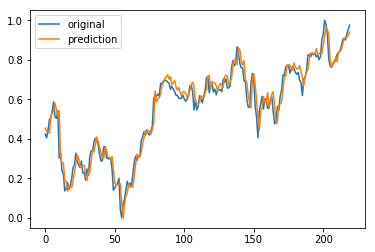

In [11]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()